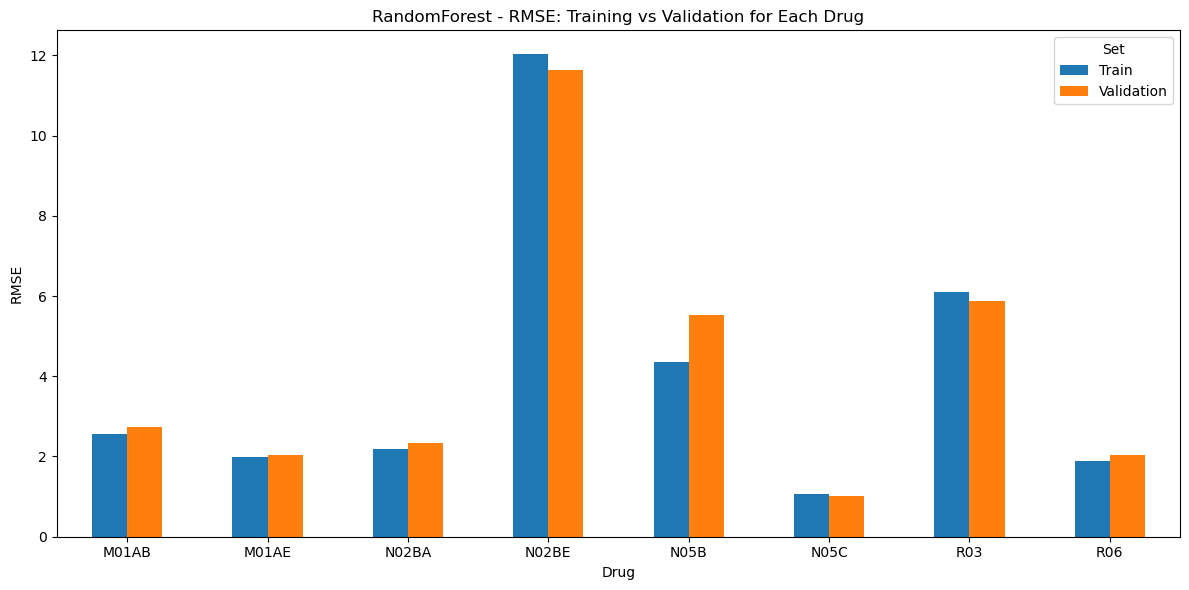

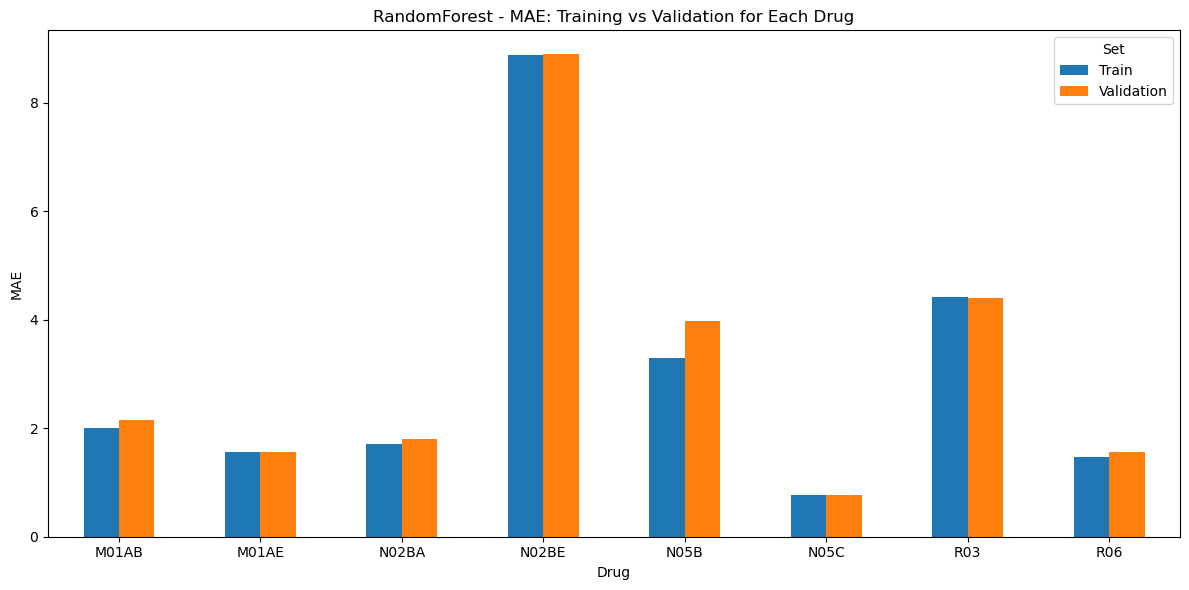

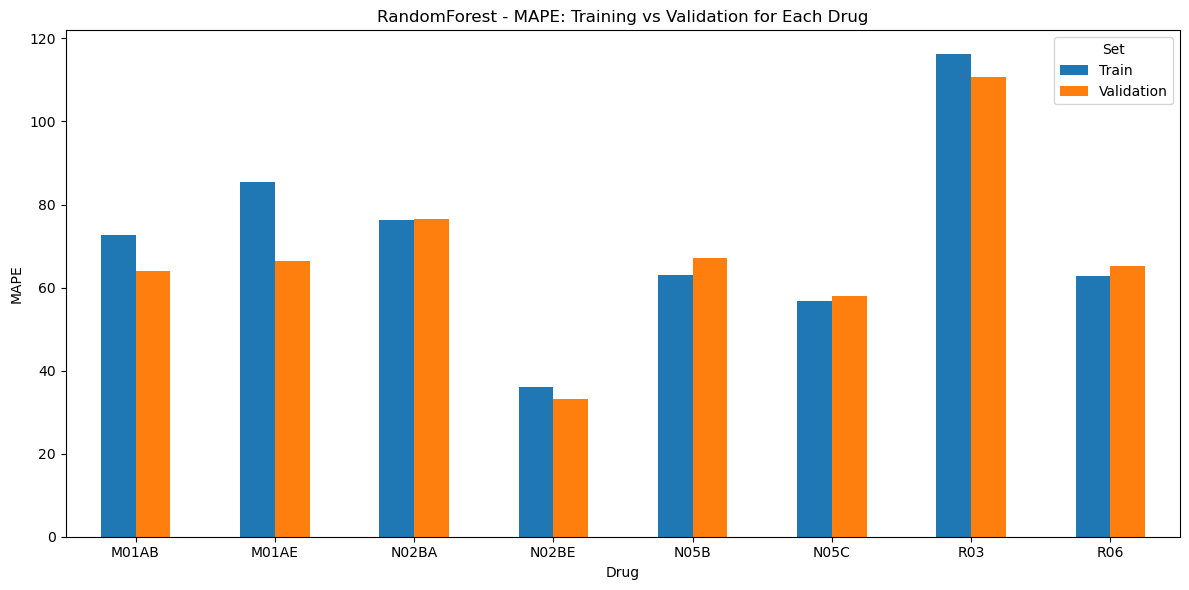

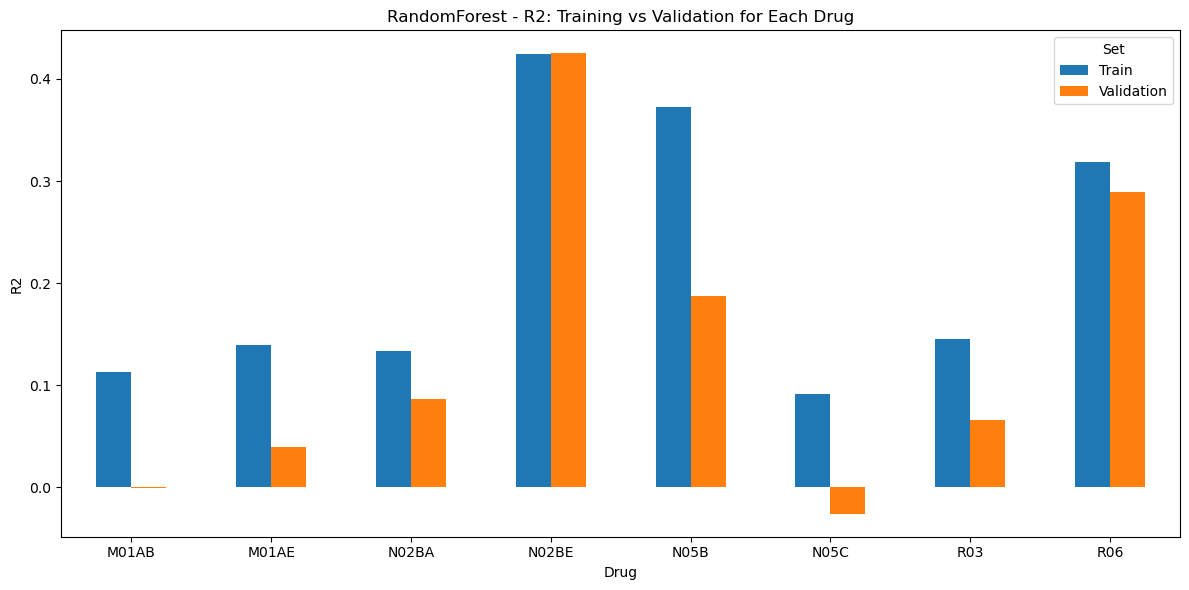

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('model_comparison_results.csv')
metrics = ['RMSE', 'MAE', 'MAPE', 'R2']  # <-- Add MAPE here

# Choose the model you want to visualize
model_to_plot = 'RandomForest'  # Change to 'XGBoost' or 'KNN' as needed

# Filter results for the selected model
filtered = results[results['Model'] == model_to_plot]

# For each metric, plot grouped bars for Train and Validation
for metric in metrics:
    plt.figure(figsize=(12, 6))
    pivot = filtered.pivot_table(index='Drug', columns='Set', values=metric)
    pivot[['Train', 'Validation']].plot(kind='bar', ax=plt.gca())
    plt.title(f"{model_to_plot} - {metric}: Training vs Validation for Each Drug")
    plt.ylabel(metric)
    plt.xlabel("Drug")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

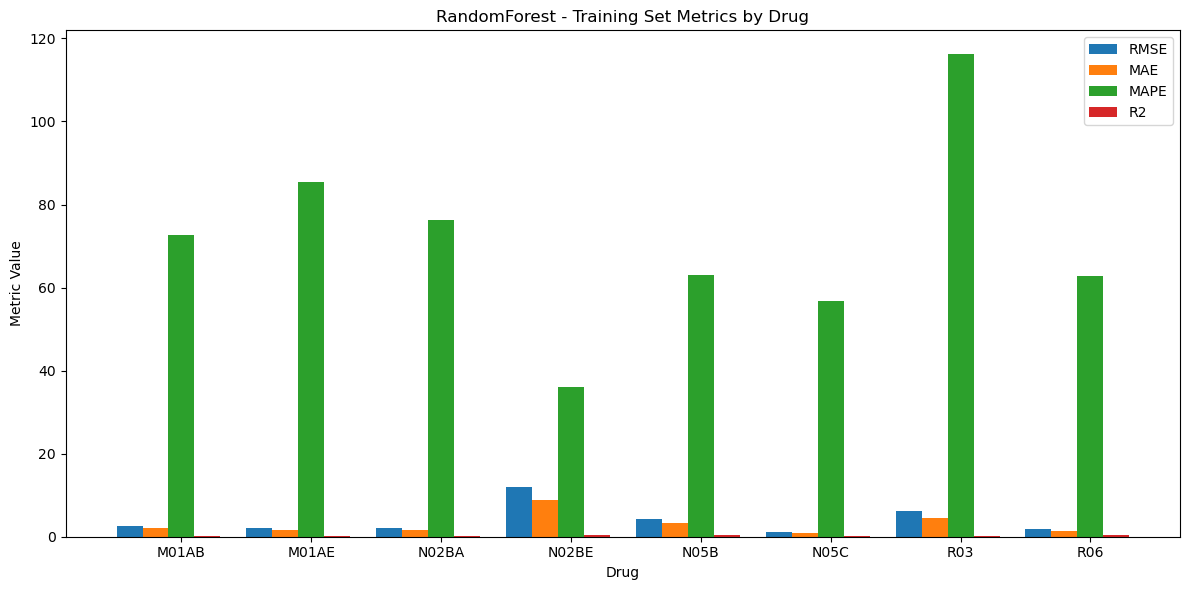

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

results = pd.read_csv('model_comparison_results.csv')
metrics = ['RMSE', 'MAE', 'MAPE', 'R2']  # <-- Add MAPE here
model_to_plot = 'RandomForest'  # Change as needed

# Filter for the selected model and training set
train_filtered = results[(results['Model'] == model_to_plot) & (results['Set'] == 'Train')]

# Prepare data for grouped bar plot
x = np.arange(len(train_filtered['Drug']))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, train_filtered[metric], width, label=metric)

ax.set_xlabel('Drug')
ax.set_ylabel('Metric Value')
ax.set_title(f'{model_to_plot} - Training Set Metrics by Drug')
ax.set_xticks(x + width * (len(metrics) / 2))
ax.set_xticklabels(train_filtered['Drug'])
ax.legend()
plt.tight_layout()
plt.show()

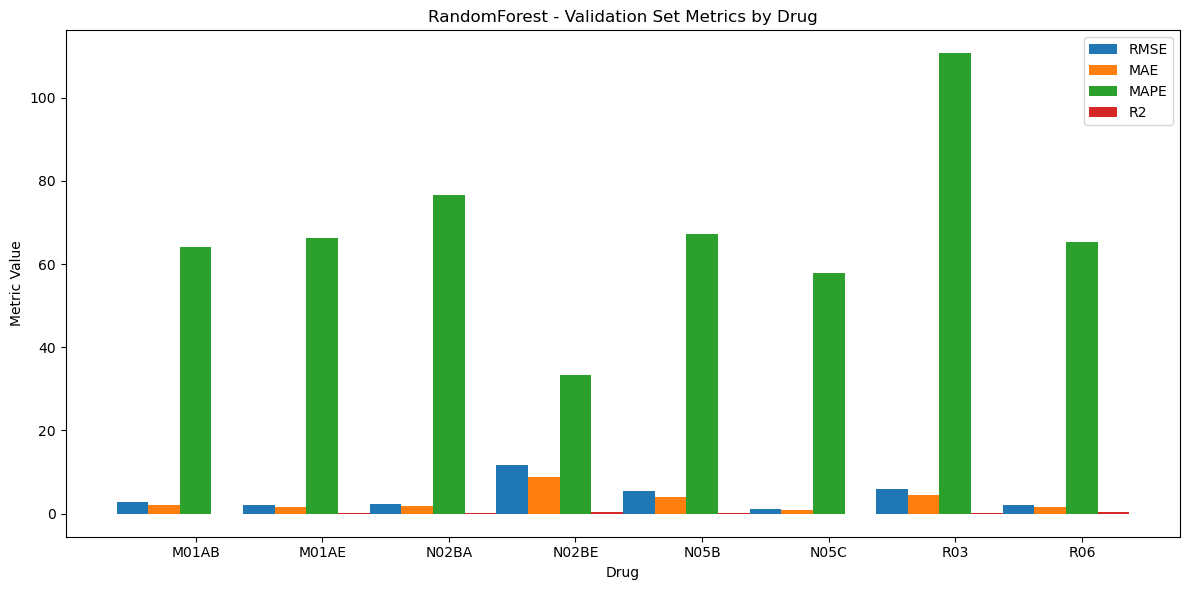

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

results = pd.read_csv('model_comparison_results.csv')
metrics = ['RMSE', 'MAE', 'MAPE', 'R2']  # <-- Add MAPE here
model_to_plot = 'RandomForest'  # Change as needed

# Filter for the selected model and validation set
val_filtered = results[(results['Model'] == model_to_plot) & (results['Set'] == 'Validation')]

# Prepare data for grouped bar plot
x = np.arange(len(val_filtered['Drug']))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, val_filtered[metric], width, label=metric)

ax.set_xlabel('Drug')
ax.set_ylabel('Metric Value')
ax.set_title(f'{model_to_plot} - Validation Set Metrics by Drug')
ax.set_xticks(x + width * (len(metrics) / 2))
ax.set_xticklabels(val_filtered['Drug'])
ax.legend()
plt.tight_layout()
plt.show()

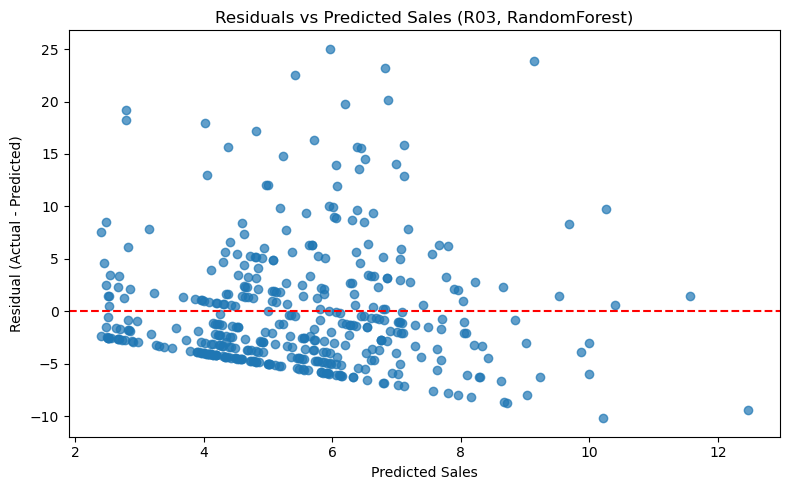

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

drug = 'R03'  # Change to the drug you want to visualize
model = 'RandomForest'
df = pd.read_csv(f'residuals/residuals_{drug}_{model}.csv')

df['Residual'] = df['Actual_Sales'] - df['Predicted_Sales']

plt.figure(figsize=(8, 5))
plt.scatter(df['Predicted_Sales'], df['Residual'], alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title(f'Residuals vs Predicted Sales ({drug}, {model})')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual (Actual - Predicted)')
plt.tight_layout()
plt.show()

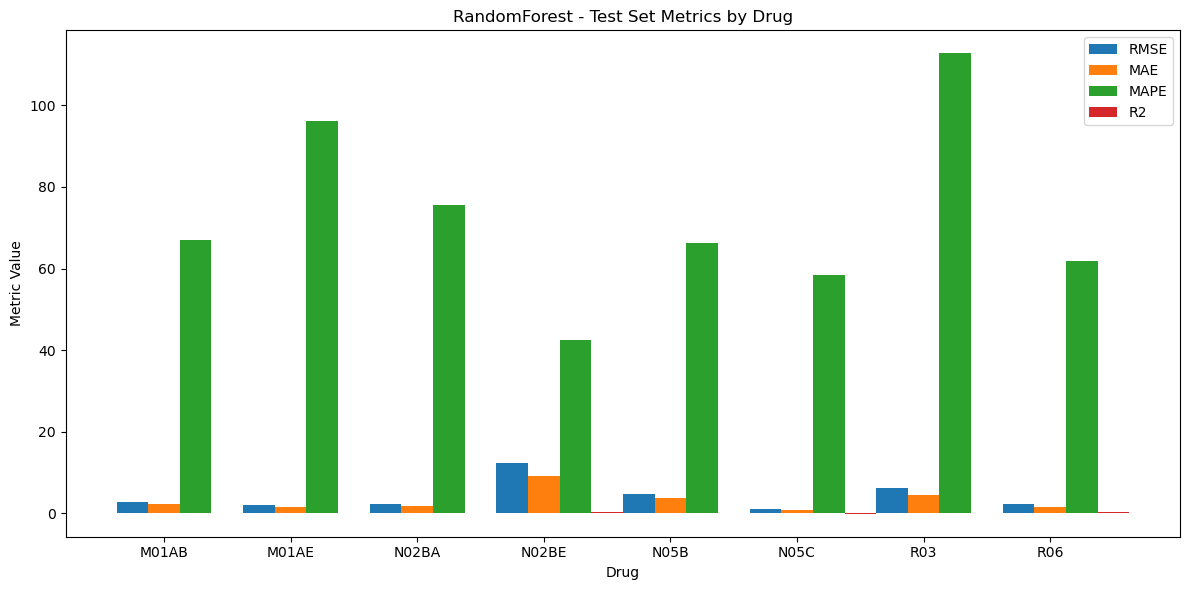

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load results
results = pd.read_csv('model_comparison_results.csv')
metrics = ['RMSE', 'MAE',  'MAPE', 'R2']  # <-- Add MAPE here
model_to_plot = 'RandomForest'  # Change to 'XGBoost' or 'KNN' as needed

# Filter for the selected model and test set
test_filtered = results[(results['Model'] == model_to_plot) & (results['Set'] == 'Test')]

# Prepare data for grouped bar plot
x = np.arange(len(test_filtered['Drug']))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, test_filtered[metric], width, label=metric)

ax.set_xlabel('Drug')
ax.set_ylabel('Metric Value')
ax.set_title(f'{model_to_plot} - Test Set Metrics by Drug')
ax.set_xticks(x + width)
ax.set_xticklabels(test_filtered['Drug'])
ax.legend()
plt.tight_layout()
plt.show()

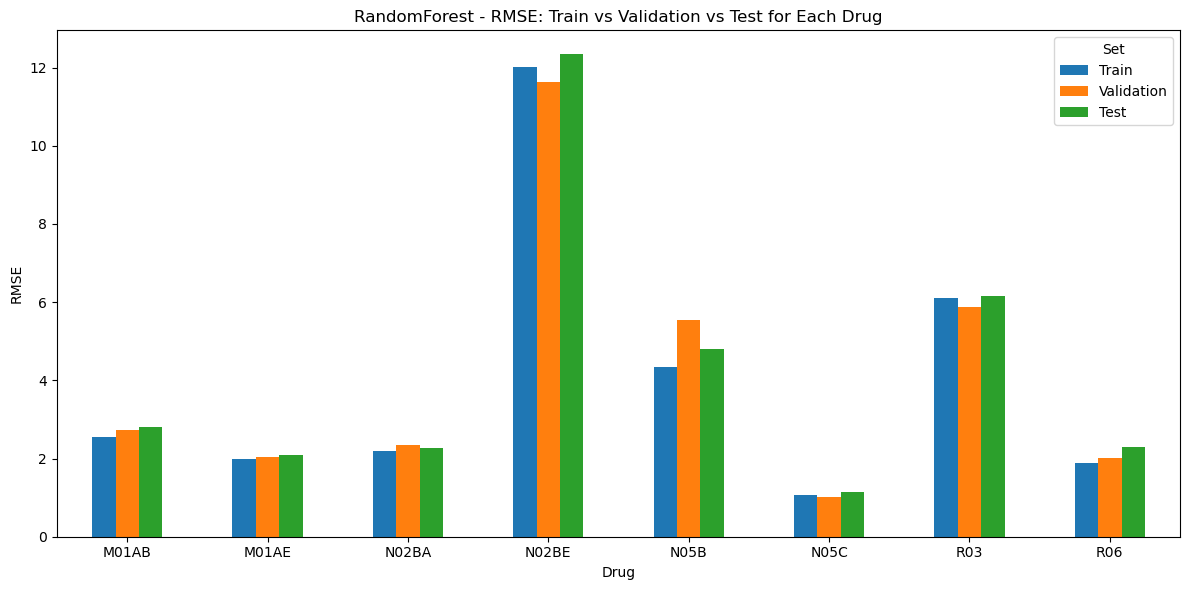

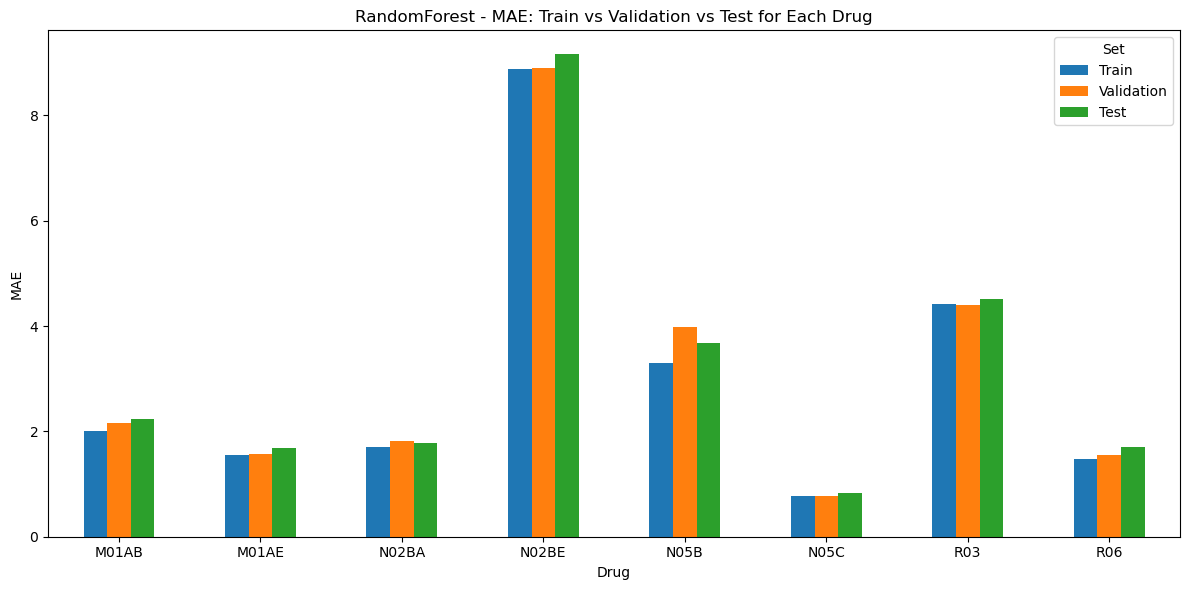

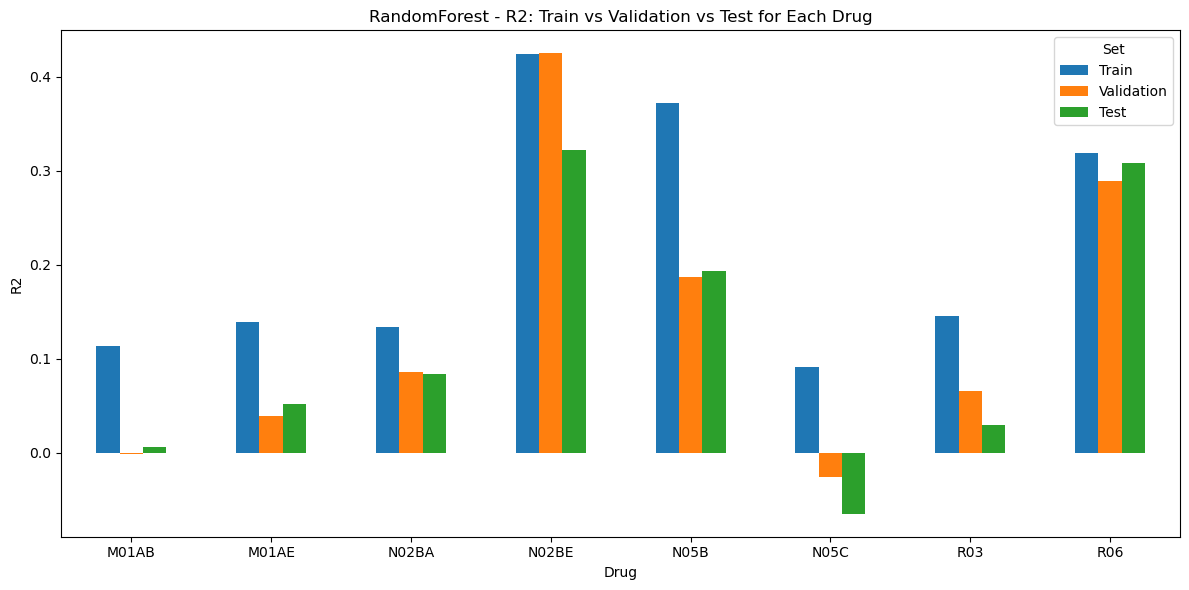

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('model_comparison_results.csv')
metrics = ['RMSE', 'MAE', 'R2']
model_to_plot = 'RandomForest'  # Change as needed

# Filter results for the selected model
filtered = results[results['Model'] == model_to_plot]

for metric in metrics:
    plt.figure(figsize=(12, 6))
    pivot = filtered.pivot_table(index='Drug', columns='Set', values=metric)
    # Plot all three sets if available
    sets_to_plot = [col for col in ['Train', 'Validation', 'Test'] if col in pivot.columns]
    pivot[sets_to_plot].plot(kind='bar', ax=plt.gca())
    plt.title(f"{model_to_plot} - {metric}: Train vs Validation vs Test for Each Drug")
    plt.ylabel(metric)
    plt.xlabel("Drug")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

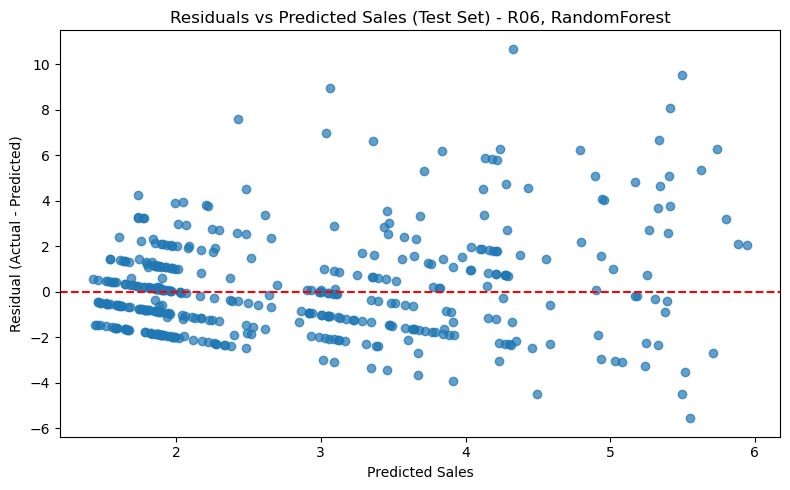

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose the drug and model you want to analyze
drug = 'R06'  # Change as needed
model = 'RandomForest'  # Change as needed

# Load test set residuals
df = pd.read_csv(f'residuals/residuals_{drug}_{model}_test.csv')

df['Residual'] = df['Actual_Sales'] - df['Predicted_Sales']

plt.figure(figsize=(8, 5))
plt.scatter(df['Predicted_Sales'], df['Residual'], alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title(f'Residuals vs Predicted Sales (Test Set) - {drug}, {model}')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual (Actual - Predicted)')
plt.tight_layout()
plt.show()

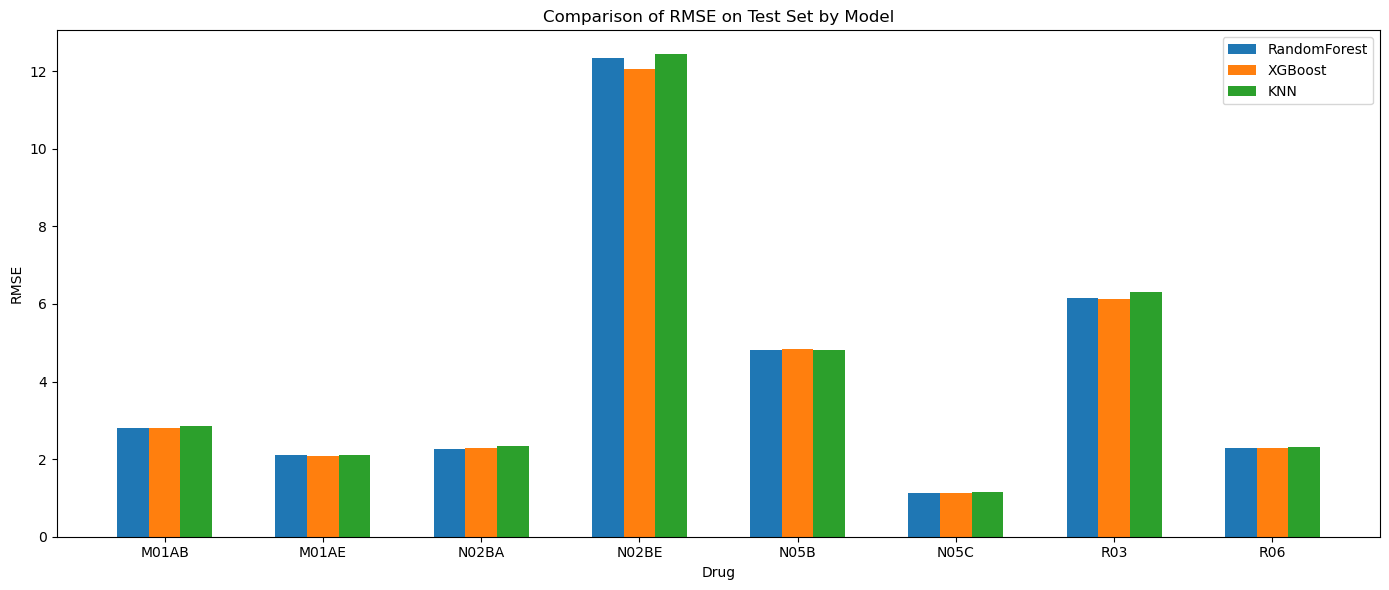

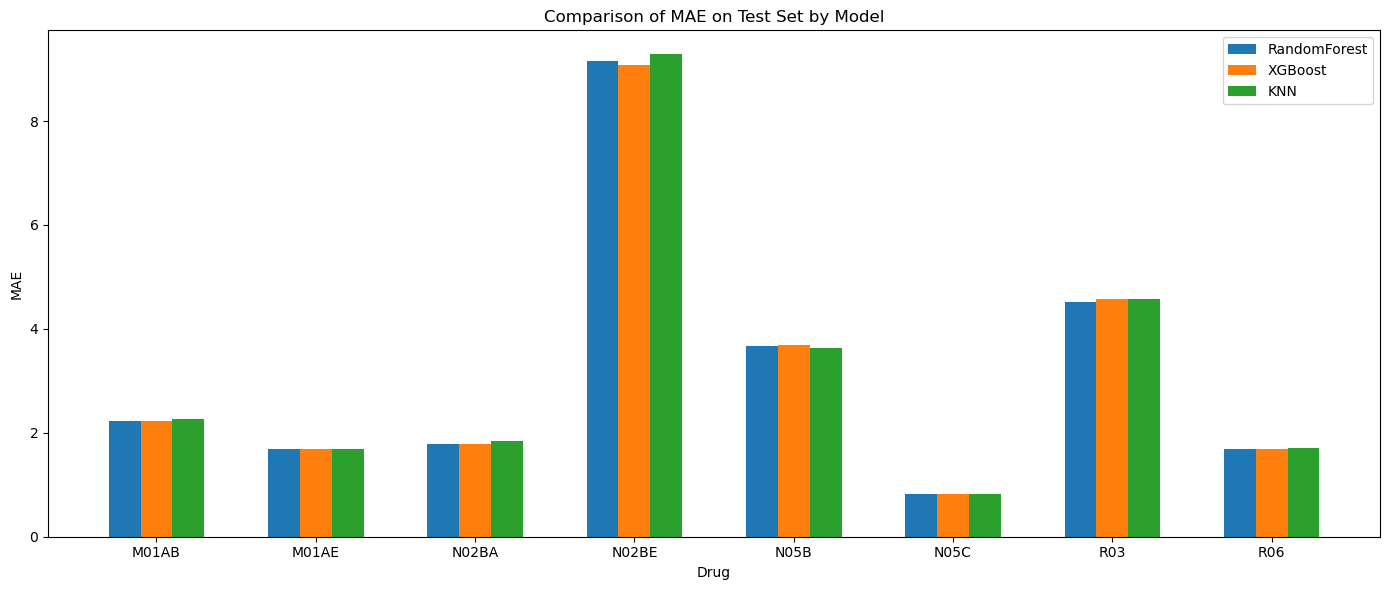

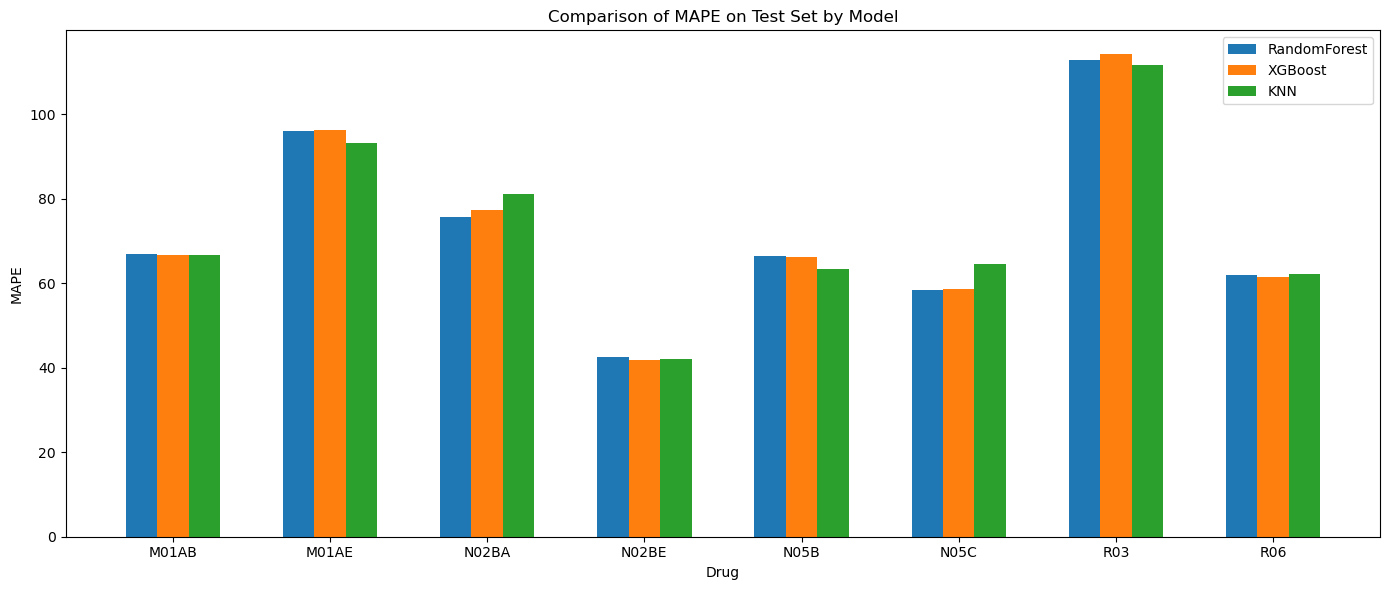

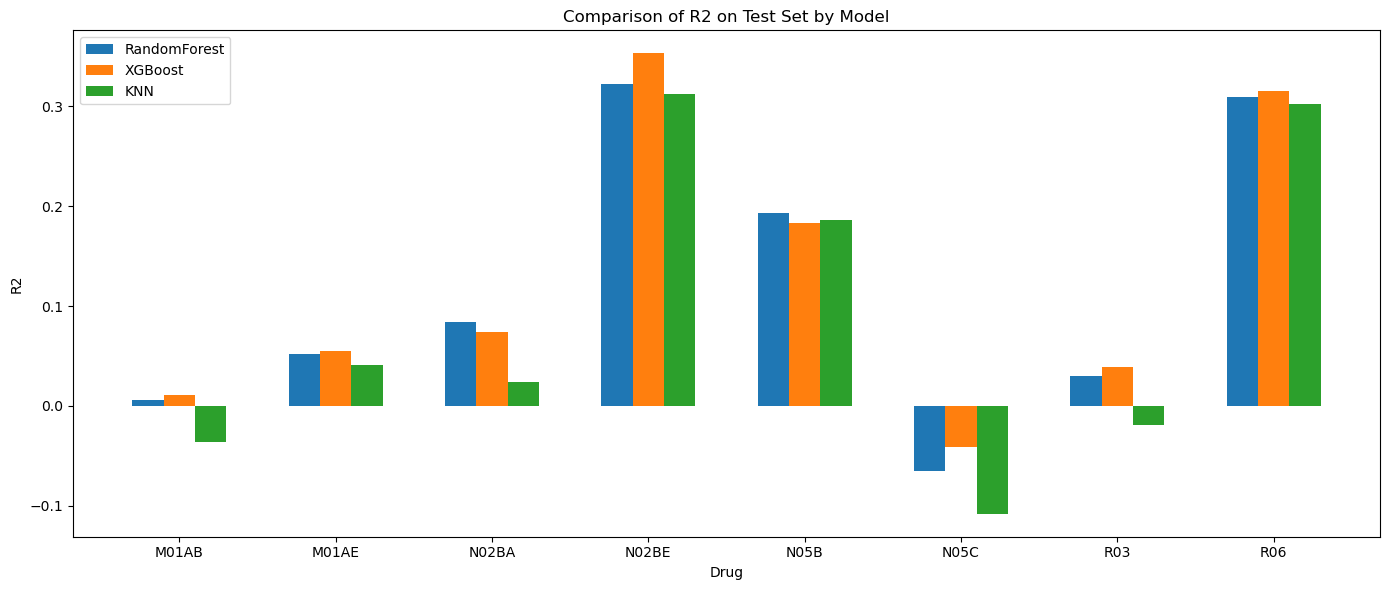

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

results = pd.read_csv('model_comparison_results.csv')
metrics = ['RMSE', 'MAE', 'MAPE', 'R2']  # <-- Add MAPE here
models = ['RandomForest', 'XGBoost', 'KNN']
drugs = results['Drug'].unique()

for metric in metrics:
    plt.figure(figsize=(14, 6))
    width = 0.2
    x = np.arange(len(drugs))
    for i, model in enumerate(models):
        model_data = results[(results['Model'] == model) & (results['Set'] == 'Test')]
        plt.bar(x + i*width, model_data[metric], width, label=model)
    plt.xticks(x + width, drugs)
    plt.xlabel('Drug')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} on Test Set by Model')
    plt.legend()
    plt.tight_layout()
    plt.show()

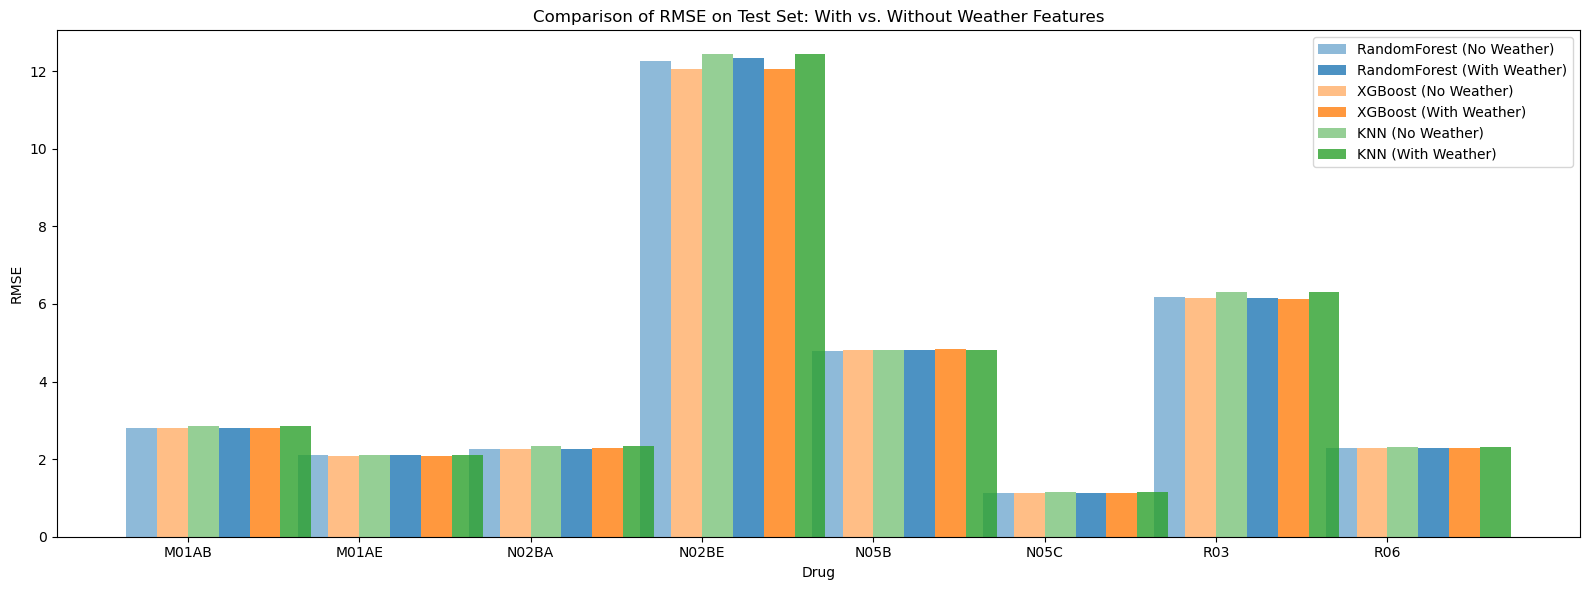

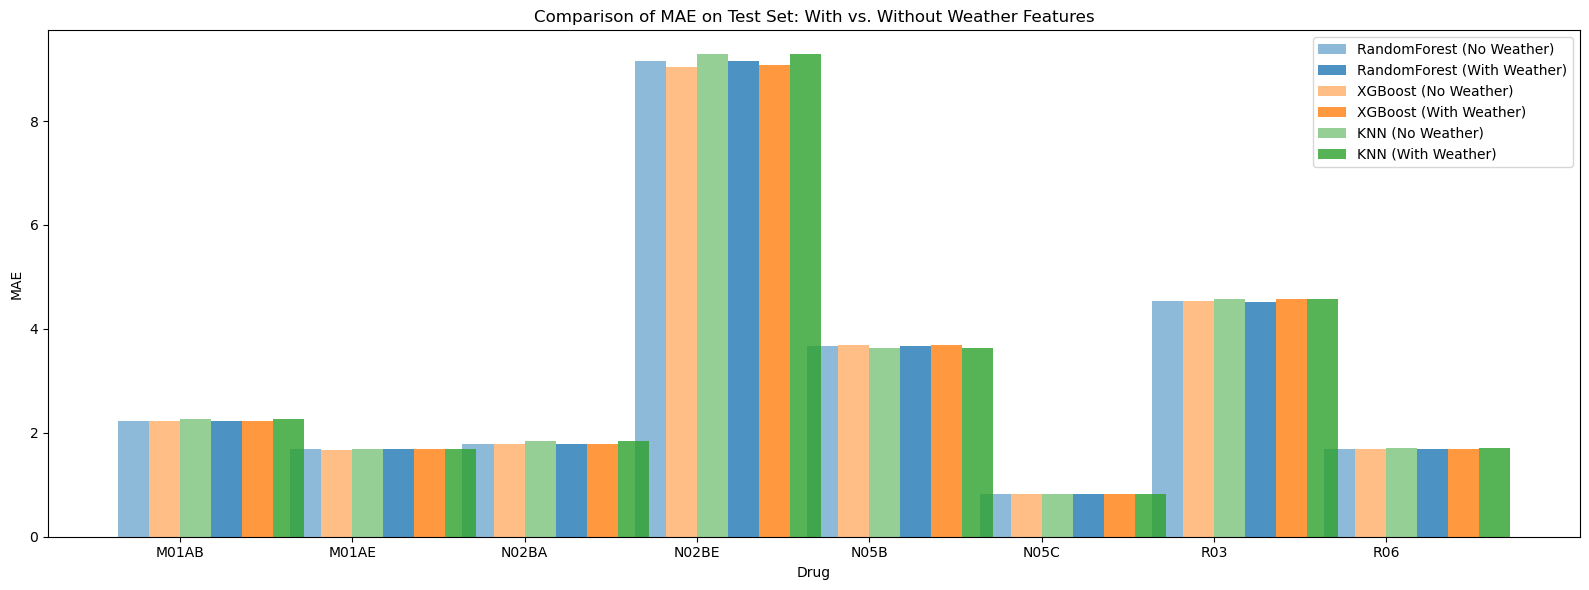

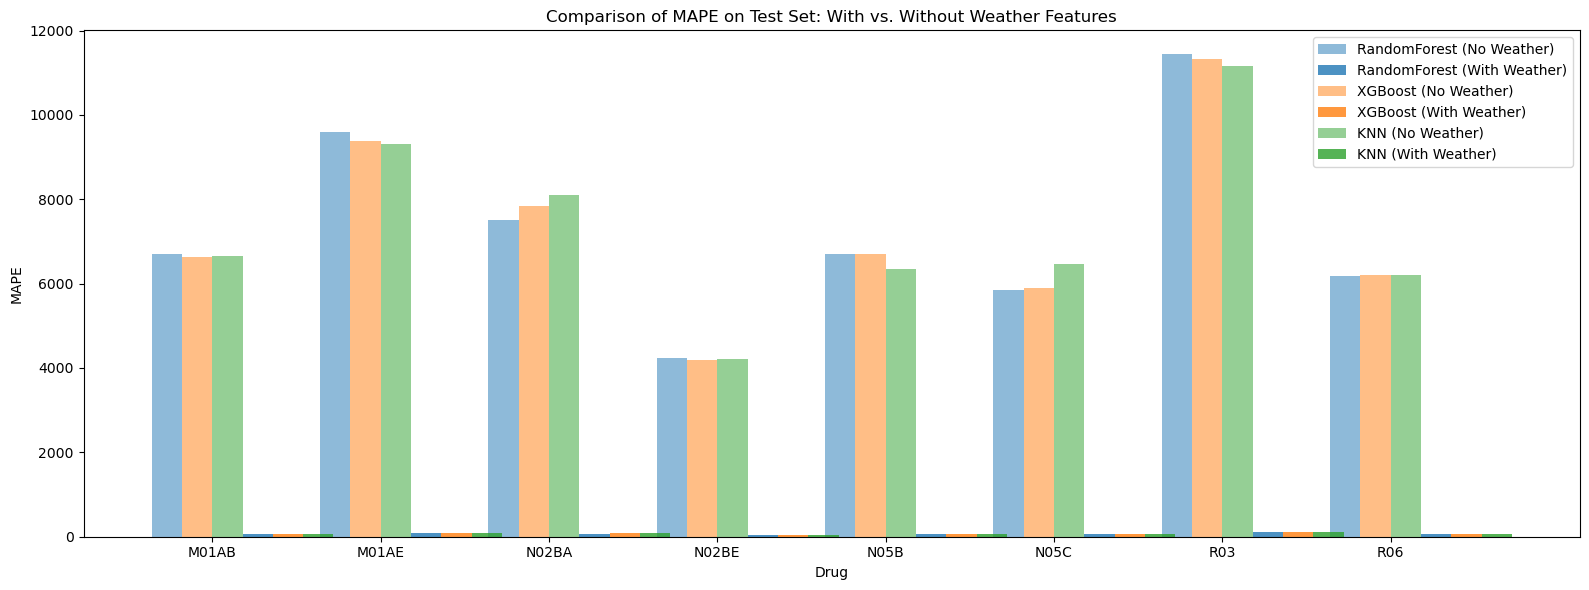

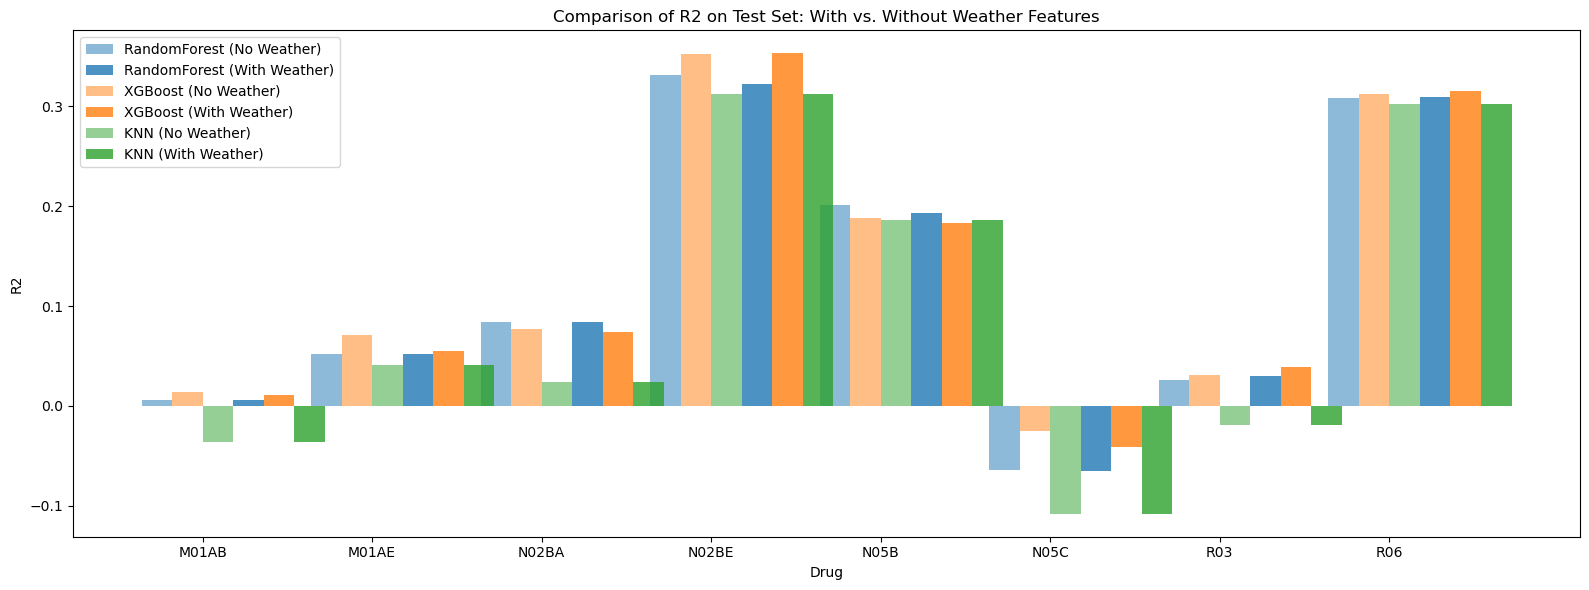

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load results
with_weather = pd.read_csv('model_comparison_results.csv')
no_weather = pd.read_csv('model_comparison_results_no_weather.csv')

metrics = ['RMSE', 'MAE', 'MAPE', 'R2']  # <-- Add MAPE here
models = ['RandomForest', 'XGBoost', 'KNN']
drugs = with_weather['Drug'].unique()

for metric in metrics:
    plt.figure(figsize=(16, 6))
    width = 0.18
    x = np.arange(len(drugs))
    for j, model in enumerate(models):
        # Get values for each model/drug
        vals_with = with_weather[(with_weather['Model'] == model) & (with_weather['Set'] == 'Test')][metric].values
        vals_no = no_weather[(no_weather['Model'] == model) & (no_weather['Set'] == 'Test')][metric].values
        plt.bar(x + j*width, vals_no, width, label=f'{model} (No Weather)', alpha=0.5, color=f'C{j}')
        plt.bar(x + j*width + width*len(models), vals_with, width, label=f'{model} (With Weather)', alpha=0.8, color=f'C{j}')
    plt.xticks(x + width*len(models)/2, drugs)
    plt.xlabel('Drug')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} on Test Set: With vs. Without Weather Features')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [1]:
import pandas as pd

df = pd.read_csv("model_comparison_results.csv")
filtered = df[(df['Set'] == 'Test') & (df['Model'] == 'RandomForest')]
print(filtered[['Drug', 'R2', 'RMSE', 'MAE', 'MAPE']].round(2))

     Drug    R2   RMSE   MAE    MAPE
2   M01AB  0.01   2.80  2.23   66.93
11  M01AE  0.05   2.10  1.69   96.05
20  N02BA  0.08   2.26  1.78   75.64
29  N02BE  0.32  12.33  9.16   42.53
38   N05B  0.19   4.80  3.68   66.34
47   N05C -0.06   1.14  0.83   58.45
56    R03  0.03   6.16  4.52  112.72
65    R06  0.31   2.30  1.70   61.86


In [12]:
import pandas as pd

df = pd.read_csv("model_comparison_results.csv")
filtered = df[df['Set'] == 'Test']
filtered[['Drug', 'Model', 'R2', 'RMSE', 'MAE', 'MAPE']].round(3).to_csv('test_set_metrics.csv', index=False)

In [13]:
import pandas as pd

# Load results
with_weather = pd.read_csv('model_comparison_results.csv')
no_weather = pd.read_csv('model_comparison_results_no_weather.csv')

# Filter for test set only
with_weather_test = with_weather[with_weather['Set'] == 'Test']
no_weather_test = no_weather[no_weather['Set'] == 'Test']

# Prepare a DataFrame for MAPE comparison
mape_comparison = pd.DataFrame({
    'Drug': with_weather_test['Drug'],
    'Model': with_weather_test['Model'],
    'MAPE_With_Weather': with_weather_test['MAPE'].round(2),
    'MAPE_No_Weather': no_weather_test['MAPE'].round(2)
})

# Save to CSV
mape_comparison.to_csv('mape_comparison_test_set.csv', index=False)